## PHYS-467 Machine Learning for Physicists
# Regression - Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Linear Regression in 1D

In [2]:
# Generate noisy linear data

n = 100
X = np.random.rand(n, 1)
y = 2 * X + 3 + .25 * np.random.randn(n, 1)

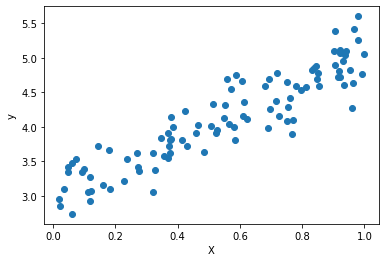

In [3]:
# Plot the training data

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y');

In [4]:
# Write a function to compute the linear-regression predictor in close form

def linear_regression(X, y):
    X = np.concatenate((X, np.ones((len(X), 1))), axis=1) # Add column for bias
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

In [5]:
# Print the predicted weights (coefficient + bias)

w = linear_regression(X, y)
w

array([[2.03260353],
       [3.00128338]])

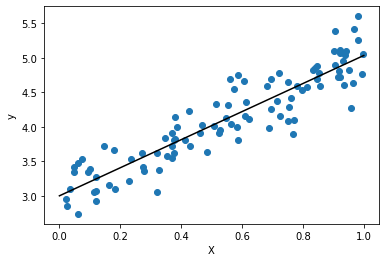

In [6]:
# Plot the training points and the predictor evaluated on a set of test points

X_test = np.linspace(0, 1, 10)
y_test_pred = w[0] * X_test + w[1]

plt.scatter(X, y)
plt.plot(X_test, y_test_pred, 'k')
plt.xlabel('X')
plt.ylabel('y');

In [7]:
# Repeat with Scikit-learn

from sklearn.linear_model import LinearRegression

linear_regression_sk = LinearRegression()
linear_regression_sk.fit(X, y)
linear_regression_sk.coef_, linear_regression_sk.intercept_

(array([[2.03260353]]), array([3.00128338]))

In [8]:
# Pseudoinverse implementation (same as sk-learn)

def linear_regression_pinv(X, y):
    X = np.concatenate((X, np.ones((len(X), 1))), axis=1)
    w = np.linalg.pinv(X).dot(y)
    return w

w_pinv = linear_regression_pinv(X, y)
w_pinv

array([[2.03260353],
       [3.00128338]])

# Exercise 2: High Dimensions

n = 100, d = 50, alpha = 2.0, rank(X.T X) = 50


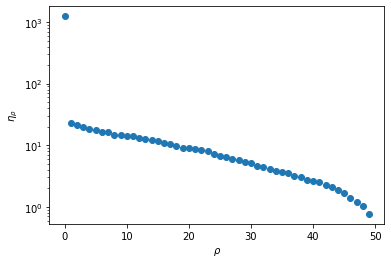

n = 50, d = 50, alpha = 1.0, rank(X.T X) = 50


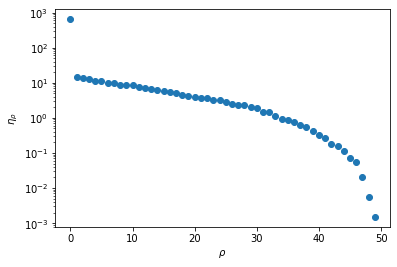

n = 30, d = 50, alpha = 0.6, rank(X.T X) = 30


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


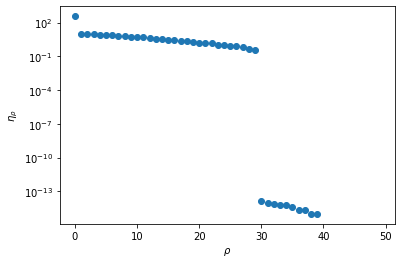

n = 20, d = 50, alpha = 0.4, rank(X.T X) = 20


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


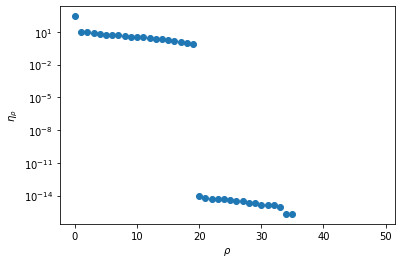

In [9]:
# Compute the rank and plot the eigenvalues of the matrix X.T X varying alpha = n / d

d = 50

for n in [100, 50, 30, 20]:

    X = np.random.rand(n, d)
    rank = np.linalg.matrix_rank(X.T.dot(X))
    evals = np.linalg.eigvals(X.T.dot(X))
    evals = np.sort(evals)[::-1]

    print(f'n = {n}, d = {d}, alpha = {n / d}, rank(X.T X) = {rank}')
    plt.semilogy(evals, 'o')
    plt.xlabel(r'$\rho$')
    plt.ylabel(r'$\eta_{\rho}$')

    plt.show();

n = 100, d = 50, alpha = 2.0, rank(X.T X) = 50


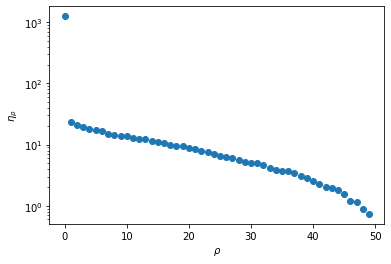

n = 50, d = 50, alpha = 1.0, rank(X.T X) = 50


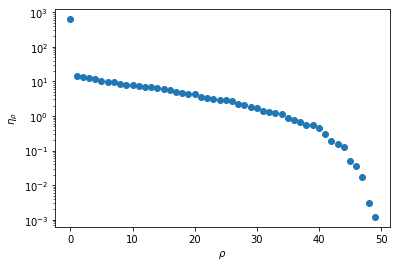

n = 30, d = 50, alpha = 0.6, rank(X.T X) = 50


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


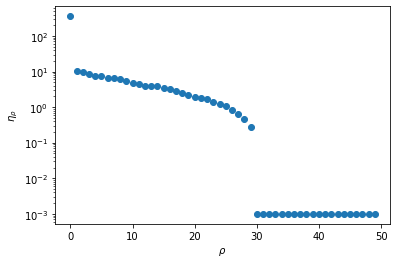

n = 20, d = 50, alpha = 0.4, rank(X.T X) = 50


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


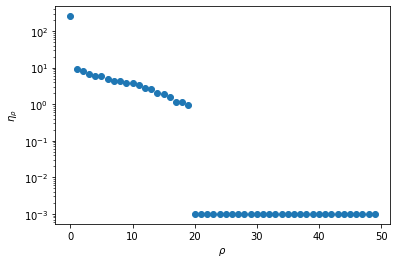

In [10]:
# Add a regularisation. What happens to the spectrum?

reg = 0.001

d = 50

for n in [100, 50, 30, 20]:

    X = np.random.rand(n, d)
    rank = np.linalg.matrix_rank(X.T.dot(X) + reg * np.eye(d))
    evals = np.linalg.eigvals(X.T.dot(X) + reg * np.eye(d))
    evals = np.sort(evals)[::-1]

    print(f'n = {n}, d = {d}, alpha = {n / d}, rank(X.T X) = {rank}')
    plt.semilogy(evals, 'o')
    plt.xlabel(r'$\rho$')
    plt.ylabel(r'$\eta_{\rho}$')
    plt.show();

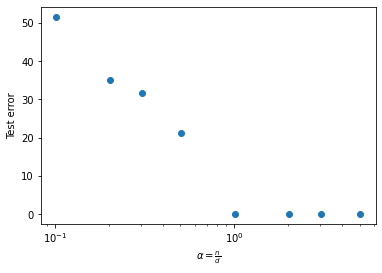

In [11]:
# Plot the test error vs alpha for high-dimensional linear data in the absence of noise (interpolation threshold when n = d)

from sklearn.metrics import mean_squared_error

d = 99

train_set_sizes = np.array([500, 300, 200, 100, 50, 30, 20, 10])

X = np.random.rand(np.max(train_set_sizes) + 500, d)
w = 2 * np.random.randn(d, 1)
y = X.dot(w) + 2

mse = []
for n in train_set_sizes:
    X_train = X[:n]
    y_train = y[:n]
    linear_regression_sk.fit(X_train, y_train) # Fits the training data
    X_test = X[-500:]
    y_test = y[-500:]
    y_test_pred = linear_regression_sk.predict(X_test) # Predicts the labels of the test points
    mse.append(mean_squared_error(y_test, y_test_pred)) # Computes the mean squared error

plt.semilogx(train_set_sizes / d, mse, 'o')
plt.xlabel(r'$\alpha=\frac{n}{d}$')
plt.ylabel('Test error');

# Exercise 3: Real Data - Boston House Prices

In [12]:
# Load the Boston house prices dataset (goal: predict the price of a house from 13 different features)

from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
boston.data.shape

(506, 13)

In [14]:
boston.target.shape

(506,)

In [15]:
# Split data in training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.4, random_state=0)

In [16]:
# Perform linear regression on the training set

linear_regression_sk = LinearRegression(normalize=True) # standard normalisation to remove multicollinearity
linear_regression_sk.fit(X_train, y_train);

mse: 25.790362150702475


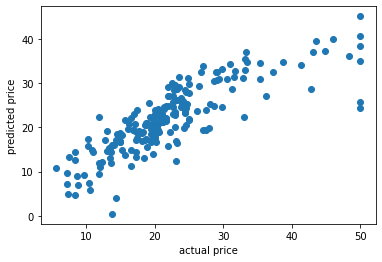

In [17]:
# Print the test error and plot the predicted prices vs the actual ones

y_pred = linear_regression_sk.predict(X_test)
print(f'mse: {mean_squared_error(y_test, y_pred)}')

plt.scatter(y_test, y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price');

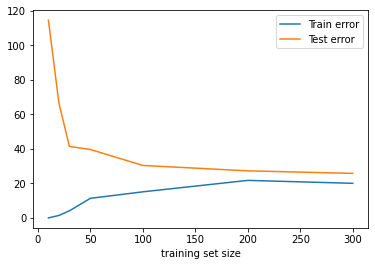

In [18]:
# Vary the training set size n and plot the learning curves (test and train error vs n)
# Comments: the train error is growing while the test error is going down, test error > train error, the curves are converging

trainset_sizes = [10, 20, 30, 50, 100, 200, 300]

train_errors = []
test_errors = []

for n in trainset_sizes:

    linear_regression_sk.fit(X_train[:n], y_train[:n])

    y_train_pred = linear_regression_sk.predict(X_train[:n])
    train_errors.append(mean_squared_error(y_train[:n], y_train_pred))

    y_test_pred = linear_regression_sk.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.plot(trainset_sizes, train_errors, label='Train error')
plt.plot(trainset_sizes, test_errors, label='Test error')
plt.xlabel('training set size')
plt.legend();

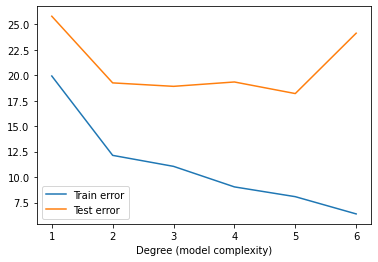

In [19]:
# Implement *non-interacting* polynomial-features regression (not present in sklearn, write a function using numpy) and vary the degree from 1 to 6. Plot the results.
# Comments: bias-variance tradeoff, U-shaped curve (while train error keeps going down, i.e. overfitting)

def non_interacting_polyfeat(X, degree):
    return np.concatenate([X**(i+1) for i in range(degree)], axis=1)

train_errors = []
test_errors = []

for degree in range(1,7):

    X_train_poly = non_interacting_polyfeat(X_train, degree)
    linear_regression_sk.fit(X_train_poly, y_train)

    y_train_pred_poly = linear_regression_sk.predict(X_train_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred_poly))

    y_test_pred_poly = linear_regression_sk.predict(non_interacting_polyfeat(X_test, degree))
    test_errors.append(mean_squared_error(y_test, y_test_pred_poly))

plt.plot(np.arange(1,7), train_errors, label='Train error')
plt.plot(np.arange(1,7), test_errors, label='Test error')
plt.xlabel('Degree (model complexity)')
plt.legend();

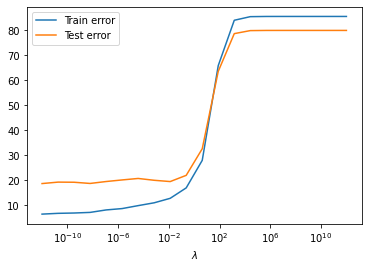

In [20]:
# Add different regularisers to the degree-6 model. Plot the results and find the best value.

from sklearn.linear_model import Ridge

reg_strenghts = np.logspace(-12, 12, 20)

train_errors = []
val_errors = []

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

for reg_strenght in reg_strenghts:

    X_train_poly = non_interacting_polyfeat(X_train, degree=6)

    ridge_regression = Ridge(alpha=reg_strenght, normalize=True)
    ridge_regression.fit(X_train_poly, y_train)

    y_train_pred_poly = ridge_regression.predict(X_train_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred_poly))

    y_val_pred_poly = ridge_regression.predict(non_interacting_polyfeat(X_val, degree=6))
    val_errors.append(mean_squared_error(y_val, y_val_pred_poly))

plt.semilogx(reg_strenghts, train_errors, label='Train error')
plt.semilogx(reg_strenghts, val_errors, label='Test error')
plt.xlabel('$\lambda$')
plt.legend();

In [21]:
lambda_opt = reg_strenghts[np.argmin(val_errors)]

ridge_regression = Ridge(alpha=lambda_opt, normalize=True)
ridge_regression.fit(X_train_poly, y_train)

y_test_pred_poly = ridge_regression.predict(non_interacting_polyfeat(X_test, degree=6))
mean_squared_error(y_test, y_test_pred_poly)

22.39730705513475

# Exercise 4: Polynomial Regression, Underfitting & Overfitting

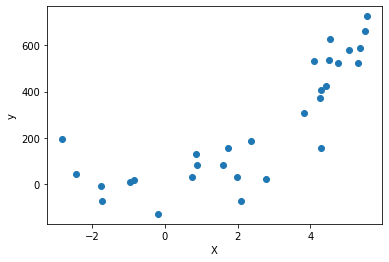

In [22]:
# Generate and plot quadratic noisy data

n = 30
X = 10 * np.random.rand(n, 1) - 3
y = 1 + 2 * X + 20 * X**2 + 100 * np.random.randn(n, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y');

In [23]:
# Do linear regression and evaluate on 100 testing data points

linear_regression_sk.fit(X, y)

X_test = np.linspace(-3, 7, 100).reshape(-1,1)
y_test = 1 + 2 * X_test + 20 * X_test**2 + 100 * np.random.randn(100, 1)
y_test_pred_lin = linear_regression_sk.predict(X_test)

print(f'mse: {mean_squared_error(y_test, y_test_pred_lin)}')

mse: 34661.951299293374


In [24]:
# Do polynomial-features regression with degree 2

from sklearn.preprocessing import PolynomialFeatures

poly_feat2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_feat2.fit_transform(X)
linear_regression_sk.fit(X_poly2, y)

y_test_pred_poly2 = linear_regression_sk.predict(poly_feat2.fit_transform(X_test))
print(f'mse: {mean_squared_error(y_test, y_test_pred_poly2)}')

mse: 10555.24617860405


In [25]:
# Repeat with a high-degree polynomial, e.g. 15

hd = 15
poly_feathd = PolynomialFeatures(degree=hd, include_bias=False)
X_polyhd = poly_feathd.fit_transform(X)

linear_regression_sk.fit(X_polyhd, y)

y_test_pred_polyhd = linear_regression_sk.predict(poly_feathd.fit_transform(X_test))
print(f'mse: {mean_squared_error(y_test, y_test_pred_polyhd)}')

mse: 174938833501.6699


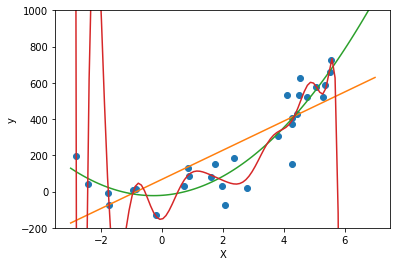

In [26]:
# Plot the 3 predictors (the linear one is underfitting, the high-degree one is overfitting, i.e. fitting noise)

plt.scatter(X, y)
plt.plot(X_test, y_test_pred_lin, 'C1')
plt.plot(X_test, y_test_pred_poly2, 'C2')
plt.plot(X_test, y_test_pred_polyhd, 'C3')
plt.ylim((-200, 1000))
plt.xlabel('X')
plt.ylabel('y');

mse: 174938833501.6699


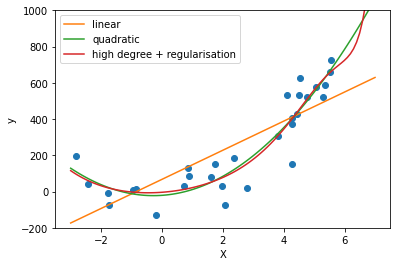

In [27]:
# add regularization as a homework

ridge_regression = Ridge(alpha=0.01, normalize=True)
ridge_regression.fit(X_polyhd, y)
y_test_pred_polyhd_ridge = ridge_regression.predict(poly_feathd.fit_transform(X_test))

print(f'mse: {mean_squared_error(y_test, y_test_pred_polyhd)}')

plt.scatter(X, y)
plt.plot(X_test, y_test_pred_lin, 'C1', label='linear')
plt.plot(X_test, y_test_pred_poly2, 'C2', label='quadratic')
plt.plot(X_test, y_test_pred_polyhd_ridge, 'C3', label='high degree + regularisation')
plt.ylim((-200, 1000))
plt.xlabel('X')
plt.ylabel('y')
plt.legend();